# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [3]:
y_train = pd.read_csv('./dados/y_train.csv', header=None)
y_test = pd.read_csv('./dados/y_test.csv', header=None)
X_train = pd.read_csv('./dados/X_train.csv')
X_train.set_index(['measure', 'subject'], inplace=True)
X_test = pd.read_csv('./dados/X_test.csv')
X_test.set_index(['measure', 'subject'], inplace=True)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [5]:
modelo_0 = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
importancias = [(ind, imp) for (ind, imp) in enumerate(modelo_0.feature_importances_)]
importancias.sort(key = lambda x: x[1], reverse=True)
cols = [par[0] for par in importancias[0:3]]
cols

[53, 266, 560]

In [6]:
X_train = X_train.iloc[:, cols]
X_valid = X_valid.iloc[:, cols]
X_test = X_test.iloc[:, cols]

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [7]:
caminho = modelo_0.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurezas = caminho.ccp_alphas, caminho.impurities

In [8]:
modelos = []
for alpha in ccp_alphas:
    modelo = DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train)
    modelos.append(modelo)

In [9]:
acc_treino = [modelo.score(X_train, y_train) for modelo in modelos]
acc_validacao = [modelo.score(X_valid, y_valid) for modelo in modelos]

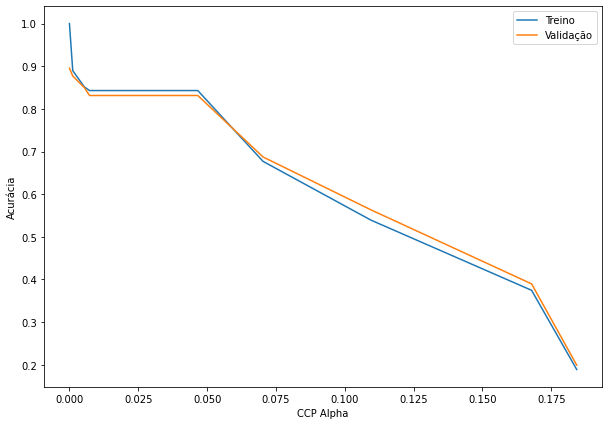

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.set_xlabel('CCP Alpha')
ax.set_ylabel('Acurácia')
ax.plot(ccp_alphas, acc_treino, label='Treino')
ax.plot(ccp_alphas, acc_validacao, label='Validação')
ax.legend()

In [15]:
ind_max_acc = 0
for ind, acc in enumerate(acc_validacao):
    if acc >= acc_validacao[ind_max_acc]:
        ind_max_acc = ind
print(f'Melhor acurácia: {acc_validacao[ind_max_acc]}')

Melhor acurácia: 0.8955386289445049


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [19]:
modelo_final = DecisionTreeClassifier(ccp_alpha=ccp_alphas[ind_max_acc]).fit(X_train, y_train)
print(f'Acurácia final: {modelo_final.score(X_test, y_test):%}')

Acurácia final: 70.648117%
